In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [7]:
from sklearn.metrics import r2_score

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis(EDA)

In [9]:
df = pd.read_csv('stroke-data.csv')

In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.shape

(5110, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Target variable(stroke) is coded as 1 has  stroke and 0 for not having stroke

In hypertension and heart_disease value 1 means has hypertension/heart disease and 0 means no hypertension/heart disease.


In [13]:
df.select_dtypes(include=['float64']).describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [14]:
df.select_dtypes(include=['float64']).skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

In [15]:
df.drop(['id'], inplace=True, axis=1)

In [16]:
# Checking for missing value
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

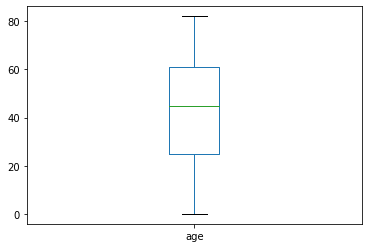

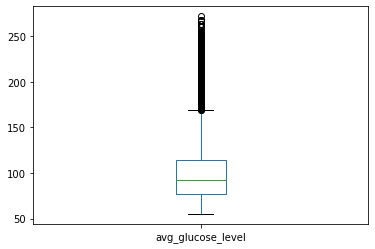

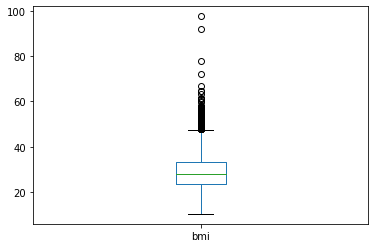

In [17]:
for columns in df.select_dtypes(include=['float64']):
    df.boxplot(column=columns, grid=False)
    plt.show()

In [18]:
# percent of missing value in bmi
df['bmi'].isna().sum() / len(df) * 100

3.9334637964774952

In [19]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

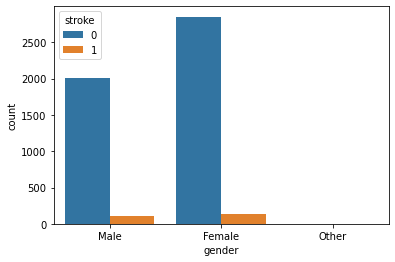

In [20]:
# Gender and stroke
sns.countplot(data=df, x='gender', hue='stroke')
plt.show()

Ladies are having high stroke rate

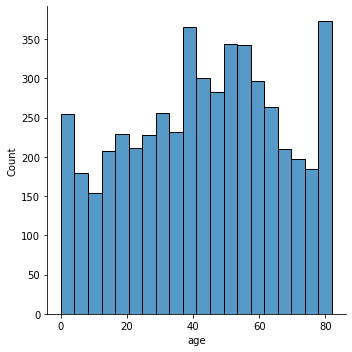

In [21]:
# Age and stroke
sns.displot(df['age'])
plt.show()

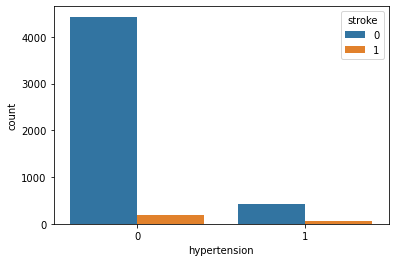

In [22]:
# Hypertension and stroke
sns.countplot(data=df, x='hypertension', hue='stroke')
plt.show()

Hypertension is not affecting stroke according to this dataset

In [23]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

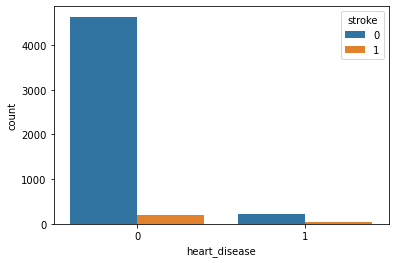

In [24]:
# heart disease and stroke
sns.countplot(data=df, x='heart_disease', hue='stroke')
plt.show()

Heart disease is not affecting stroke according to this dataset

In [25]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

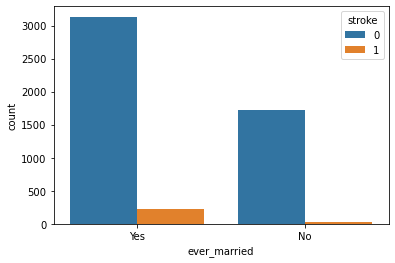

In [26]:
# ever married and stroke
sns.countplot(data=df, x='ever_married', hue='stroke')
plt.show()

Married people are having high stroke rate

In [27]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

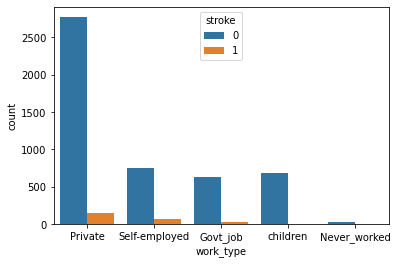

In [28]:
# work_type and stroke
sns.countplot(data=df, x='work_type', hue='stroke')
plt.show()

People working in private sector has high stroke rate

In [29]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

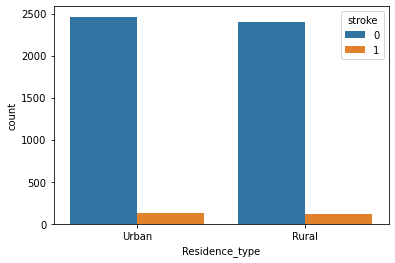

In [30]:
# residence type and stroke
sns.countplot(data=df, x='Residence_type', hue='stroke')
plt.show()

People leaving in urban area are having more chances of stroke

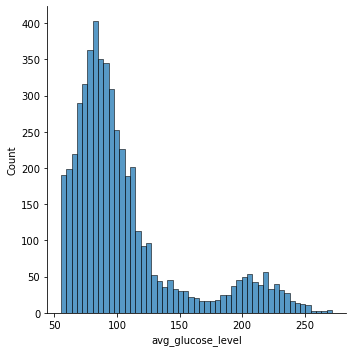

In [31]:
# avg_glucose_level and stroke
sns.displot(df['avg_glucose_level'])
plt.show()

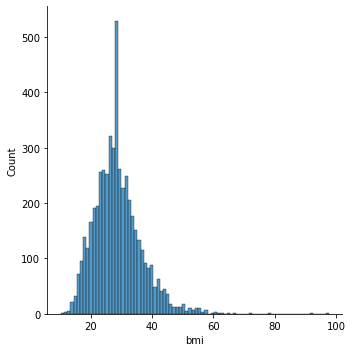

In [32]:
# bmi and stroke
sns.displot(df['bmi'])
plt.show()

In [33]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

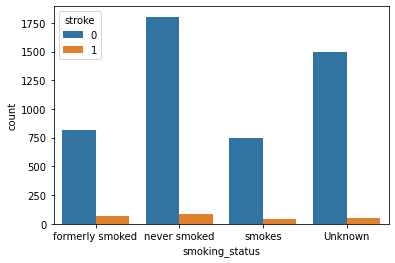

In [34]:
# smoking_status  and stroke
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.show()

There is no much difference in stroke wrt to smoking status

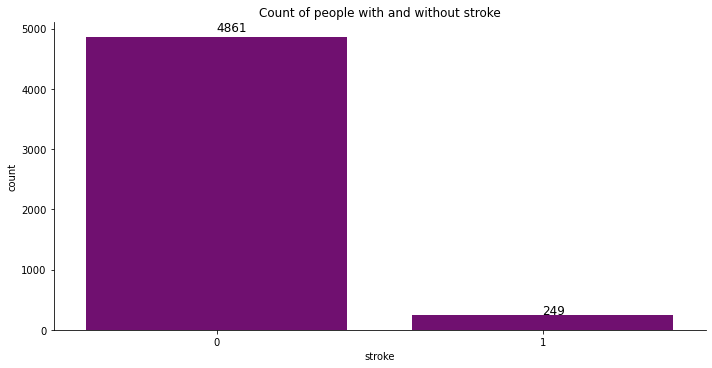

In [35]:
g = sns.catplot(x = "stroke", data=df, aspect=2, kind="count", color='purple')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() * 1.02, 
            format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.title('Count of people with and without stroke', color='black')
plt.show()

4861 people do not have stroke and 249 people have stroke. This shows that dataset is imbalance.

In [36]:
categorical =  df.select_dtypes(include = ["object"])

# Feature Engineering

In [37]:
# Label Encoding

label_encoder = preprocessing.LabelEncoder()
for cols in categorical:
    # Encode labels in column .
    categorical[cols]= label_encoder.fit_transform(categorical[cols])
    categorical[cols].unique()

In [38]:
categorical.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2


In [39]:
X = df.select_dtypes(include=['float64', 'int64'])

In [40]:
X = pd.concat([X, categorical], axis=1)

In [41]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,28.1,1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2


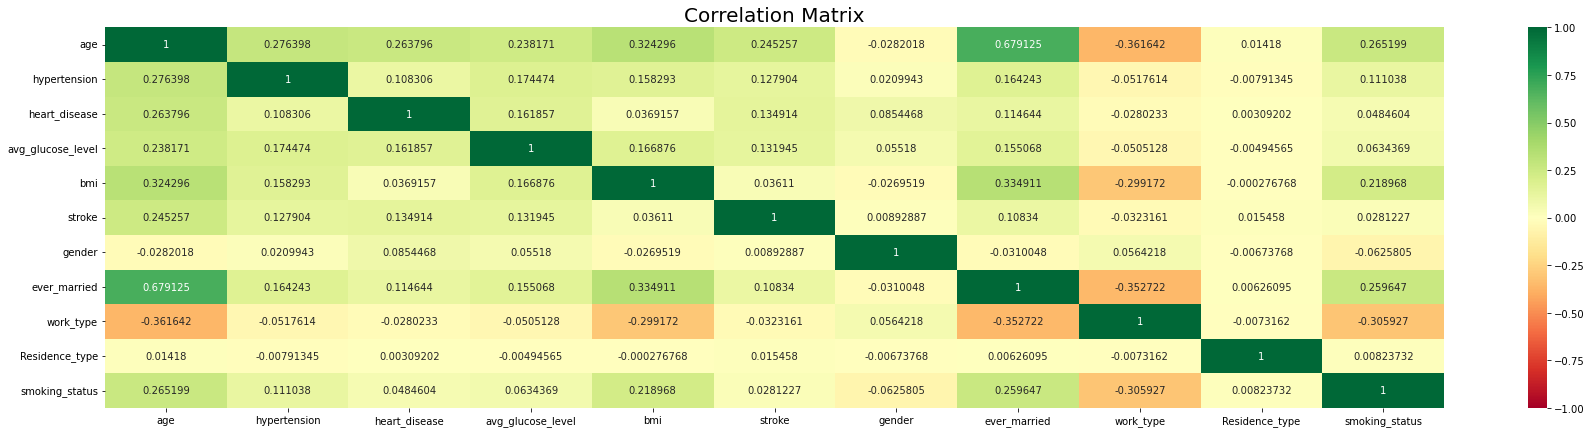

In [42]:
# Correlation
# Correlation Matrix Plotting
plt.figure(figsize=(30,7)) 
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(X.corr(),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')  
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

SelectKBest is a filter method that selects the top K features based on a statistical test.

In [43]:
X = X.drop(['stroke'], axis=1)
y = df['stroke']

In [44]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

# Balancing dataset

In [47]:
smote=SMOTE()
X,y=smote.fit_resample(X,y)

# Splitting data

In [48]:
# Train_test split 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7291, 10)
(2431, 10)
(7291,)
(2431,)


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [51]:
# coeff_df=pd.DataFrame(X[cols].columns)
coeff_df=pd.DataFrame(X.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,age,0.088893
1,hypertension,-1.405385
2,heart_disease,-0.937690
3,avg_glucose_level,0.008335
4,bmi,-0.022627
5,gender,-0.767354
6,ever_married,-1.286970
7,work_type,-0.424289
8,Residence_type,-0.949457
9,smoking_status,-0.340316


# Random Forest Model

In [52]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [53]:
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
age,0.554290
avg_glucose_level,0.114842
work_type,0.105160
bmi,0.082204
smoking_status,0.060600
gender,0.032896
Residence_type,0.024726
ever_married,0.012257
hypertension,0.009075
heart_disease,0.003951


# Gradient Boosting

In [54]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [55]:
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
age,0.598493
avg_glucose_level,0.121986
bmi,0.102473
work_type,0.064034
smoking_status,0.030639
gender,0.024032
Residence_type,0.023026
ever_married,0.014070
hypertension,0.012278
heart_disease,0.008970


# K-Nearest Neighbours

In [68]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [75]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)

AdaBoostClassifier()

# Model Evaluation

In [76]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
# y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_adb = adb.predict(X_test)

In [57]:
# Logistic Regression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.7984368572603867
Precision 0.7932421560740145
Recall 0.8088597210828548
f1_score 0.8009748172217709


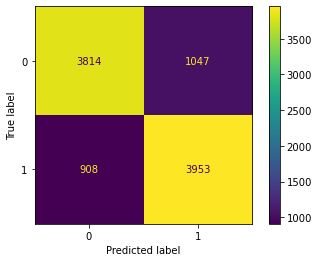

In [63]:
metrics.plot_confusion_matrix(logreg,X,y)
plt.show()

In [59]:
# Random Forest

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8445084327437269
Precision 0.8044895003620565
Recall 0.911402789171452
f1_score 0.8546153846153846


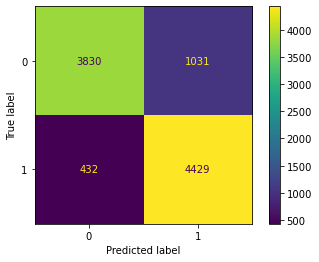

In [64]:
metrics.plot_confusion_matrix(rf,X,y)
plt.show()

In [61]:
# Gradient Boosting

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9341834635952283
Precision 0.9219123505976096
Recall 0.9491386382280558
f1_score 0.9353274050121261


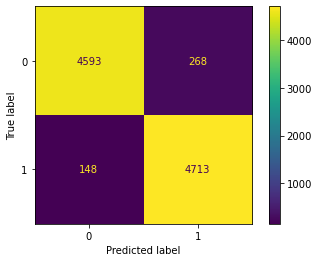

In [66]:
metrics.plot_confusion_matrix(gbm,X,y)
plt.show()

In [71]:
# K-Nearest Neighbours

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision",metrics.precision_score(y_test,y_pred_knn))
print("Recall",metrics.recall_score(y_test,y_pred_knn))
print("f1_score",metrics.f1_score(y_test,y_pred_knn))

Accuracy: 0.8654874537227478
Precision 0.8046448087431693
Recall 0.9663658736669402
f1_score 0.8781215057771151


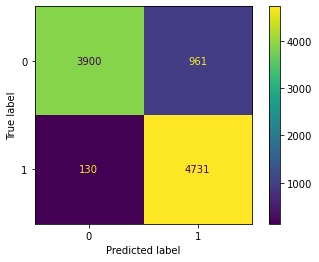

In [72]:
metrics.plot_confusion_matrix(knn,X,y)
plt.show()

In [77]:
# Ada Boost

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adb))
print("Precision",metrics.precision_score(y_test,y_pred_adb))
print("Recall",metrics.recall_score(y_test,y_pred_adb))
print("f1_score",metrics.f1_score(y_test,y_pred_adb))

Accuracy: 0.8436857260386672
Precision 0.8259518259518259
Recall 0.8720262510254306
f1_score 0.8483639265762171


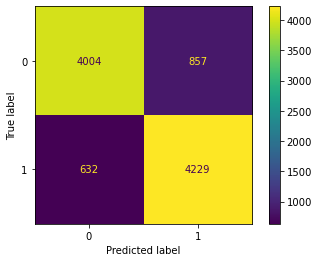

In [78]:
metrics.plot_confusion_matrix(adb,X,y)
plt.show()